# protostars
## 22- `star_proto_varA_K_delR.py` experiment 9
### I. Experiment with variable exponent of reddening, and rebranding of vsini

`Starfish` with the `star_proto_varA_K_delR.py` code

Full available spectral region

In [1]:
import pandas as pd

In [2]:
ws = np.load("../sf/exp9/output/bb_absolute/run01/emcee_chain.npy")

In [3]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [4]:
ws.shape

(40, 5000, 16)

In [5]:
from matplotlib.ticker import MaxNLocator

In [8]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$\delta R$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$A_K$", r"$\alpha$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

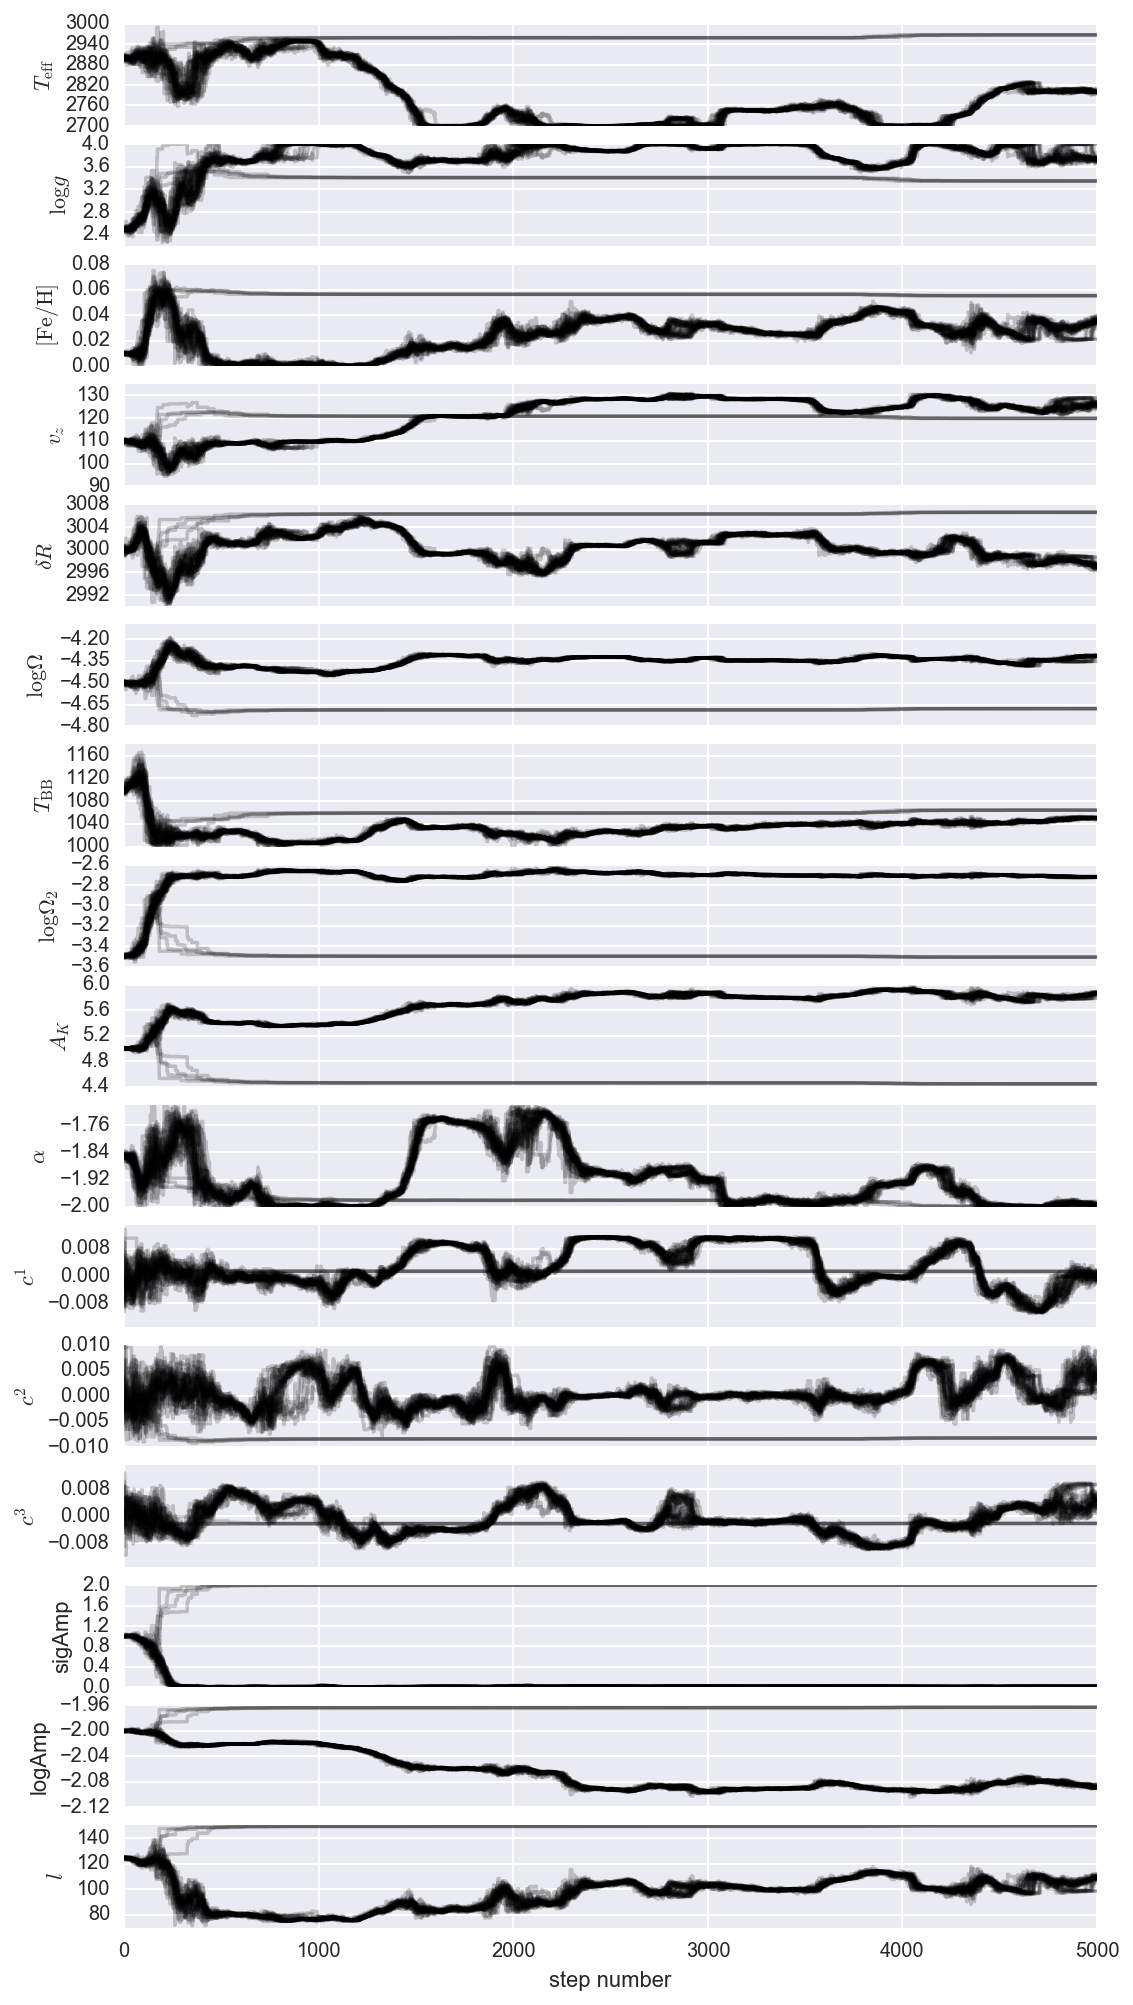

In [9]:
fig, axes = plt.subplots(16, 1, sharex=True, figsize=(8, 14))
for i in range(0, 16, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[15].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

## Disaster!  Exp9 run01 failed because we set `self.ss[0] = 0.01`, which *does* affect the FFT, with no "divide by zero" error.

When you set `self.ss[0] = 0.01`, it acts as a DC component that shifts the vertical registration of the spectrum, screwing up all normalization efforts, and irretrievably screwing up any attempt at inference.  

My guess---without any exerimentation---is that the absolute value of the hardcoded 0.01 is related to DC shift, meaning we could set to `1.0e-20`, or something.  But the motivation for overriding `ss[0]` was avoiding a "divide by zero error" that I have never seen.  If it's a problem I will deal with it then!

I wonder if this is a bug and has affected other spectral inference tasks?